Some representations can be derived by using machine learning procedures, which inform us about how
the algorithms operate and offer us a more precise overview of the role of each
predictor in the predictions obtained. 

In particular, learning curves can provide
a quick diagnosis to improve your models. It helps you figure out whether you
need more observations, or you need to enrich your variables.

## Learning curves

A learning curve is a useful diagnostic graphic that depicts the behavior of your
machine learning algorithm (your hypothesis) with respect to the available quantity
of observations. The idea is to compare how the training performance (the error or
accuracy of the in-sample cases) behaves with respect to the cross-validation (usually
ten-fold) using different in-sample sizes.

As far as the training performance is concerned:

High bias hypothesis tends to start with average performances, decreases
rapidly on being exposed to more complex data, and then remains at the
same level of performance, no matter how many cases you further add.
Low bias learners tend to generalize better in presence of many cases, but
they are limited in their capability to approximate complex data structures,
and hence their limited performance.

High variance hypothesis tends to start high in performance and then
slowly decreases as you add more cases. It tends to decrease slowly
because it has a high capacity of recording the in-sample characteristics.

As for cross-validation:

High bias hypothesis tends to start with low performance, but it grows
very rapidly until it reaches almost the same performance as that of the
training. Then, it stops growing.

High variance hypothesis tends to start with very low performance. Then,
steadily but slowly, it improves as more cases help generalize. It hardly
reads the in-sample performances, and there is always a gap between them.



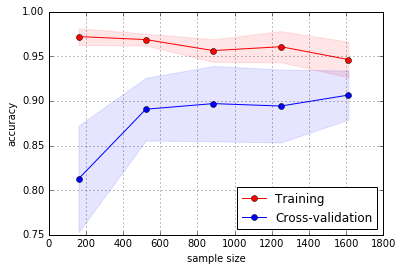

In [3]:
# Learning curve
import numpy as np
from sklearn.learning_curve import learning_curve, validation_curve
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()
X, y = digits.data, digits.target
hypothesis = SGDClassifier(loss='log', shuffle=True, n_iter=5, penalty='l2', alpha=0.0001, random_state=3)


train_size, train_scores, test_scores = learning_curve(hypothesis, X, y, train_sizes=np.linspace(0.1,1.0,5), 
                                                       cv=10, scoring='accuracy', exploit_incremental_learning=False, n_jobs=-1)
mean_train  = np.mean(train_scores,axis=1)
upper_train = np.clip(mean_train + np.std(train_scores,axis=1),0,1)
lower_train = np.clip(mean_train - np.std(train_scores,axis=1),0,1)
mean_test   = np.mean(test_scores,axis=1)
upper_test = np.clip(mean_test + np.std(test_scores,axis=1),0,1)
lower_test = np.clip(mean_test - np.std(test_scores,axis=1),0,1)
plt.plot(train_size,mean_train,'ro-', label='Training')
plt.fill_between(train_size, upper_train, lower_train, alpha=0.1, color='r')
plt.plot(train_size,mean_test,'bo-', label='Cross-validation')
plt.fill_between(train_size, upper_test, lower_test, alpha=0.1, color='b')
plt.grid()
plt.xlabel('sample size') # adds label to x axis
plt.ylabel('accuracy') # adds label to y axis
plt.legend(loc='lower right', numpoints= 1)
plt.show()

The learning_curve class requires the following as an input:

    • A series of training sizes stored in a list

    • An indication of the number of folds to use and the error measure

    • Your machine learning algorithm to test (parameter estimator)

    • The predictors (parameter X) and the target outcome (parameter y)

As a result, the class will produce three arrays—the first one containing the effective
training sizes, the second having the training scores for each cross-validation
iteration, and the last one having the cross-validation scores.
By applying the mean and the standard deviation for both training and crossvalidation,
it is possible to display in the graph both the curve trends and their
variation. You can also provide information about the stability of the recorded
performances.

## Validation curves

Validation curves estimate
the training and cross-validation performance with respect to the values that a
hyper-parameter can take.

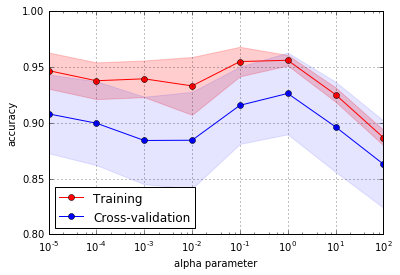

In [4]:
# Validation curves
from sklearn.learning_curve import validation_curve
testing_range = np.logspace(-5,2,8)
hypothesis = SGDClassifier(loss='log', shuffle=True, n_iter=5, penalty='l2', alpha=0.0001, random_state=3)
train_scores, test_scores = validation_curve(hypothesis, X, y, 'alpha', param_range=testing_range, cv=10, scoring='accuracy', n_jobs=-1)
mean_train  = np.mean(train_scores,axis=1)
upper_train = np.clip(mean_train + np.std(train_scores,axis=1),0,1)
lower_train = np.clip(mean_train - np.std(train_scores,axis=1),0,1)
mean_test   = np.mean(test_scores,axis=1)
upper_test = np.clip(mean_test + np.std(test_scores,axis=1),0,1)
lower_test = np.clip(mean_test - np.std(test_scores,axis=1),0,1)
plt.semilogx(testing_range,mean_train,'ro-', label='Training')
plt.fill_between(testing_range, upper_train, lower_train, alpha=0.1, color='r')
plt.fill_between(testing_range, upper_train, lower_train, alpha=0.1, color='r')
plt.semilogx(testing_range,mean_test,'bo-', label='Cross-validation')
plt.fill_between(testing_range, upper_test, lower_test, alpha=0.1, color='b')
plt.grid()
plt.xlabel('alpha parameter') # adds label to x axis
plt.ylabel('accuracy') # adds label to y axis
plt.ylim(0.8,1.0)
plt.legend(loc='lower left', numpoints= 1)
plt.show()

param_name and param_range parameters, which should
be respectively provided with the hyper-parameter and the range of the same that has
to be tested. As for the results, the training and test results are provided in arrays.

## Feature importance

Selecting the
right variables can improve your learning process by reducing noise, variance of
estimates, and the burden of too many computations. Ensemble methods, such
as RandomForests in particular, can provide you with a different view of the
role played by a variable when working together with other ones in your dataset
compared to the greedy approach of a stepwise backward or forward selection.

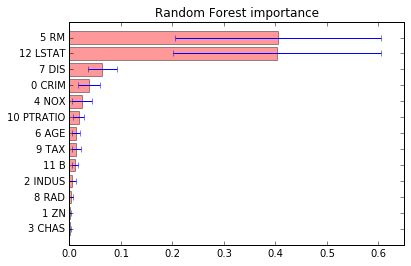

In [5]:
# Importance of variables
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target
feature_names = np.array([' '.join([str(b), a]) for a,b in zip(boston.feature_names,range(len(boston.feature_names)))])
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, random_state=101).fit(X, y)
importance = np.mean([tree.feature_importances_ for tree in RF.estimators_],axis=0)
std = np.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)
indices = np.argsort(importance)
range_ = range(len(importance))
plt.figure()
plt.title("Random Forest importance")
plt.barh(range_,importance[indices],
       color="r", xerr=std[indices], alpha=0.4, align="center")
plt.yticks(range(len(importance)), feature_names[indices])
plt.ylim([-1, len(importance)])
plt.xlim([0.0, 0.65])
plt.show()

For each of the estimators (in our case, 100), the algorithm estimated a score to rank
each variable importance. The RandomForest model is made up of complex decision
trees that are made up of many branches. One of its variables is deemed important if,
after casually permuting its original values, the resulting predictions of the permuted
model are very different in terms of accuracy as compared to the predictions of the
original model.

The importance vectors are averaged over the number of estimators, and the
standard deviation of the estimations is computed by a list comprehension (the
assignment of variables importance and std). Now, sorted according to the
importance score (the vector indices), the results are projected onto a bar graph
with an error bar provided by the standard deviation.

In our LSTAT analysis, the percentage of lower status population in the area and
RM, which is the average number of rooms per dwelling, are pointed out as the
most decisive variables in our RandomForest model.

## Gradient BoostingTrees partial dependence plot

Sometimes, you
may need to understand better why a variable is important in predicting a certain
outcome. Gradient Boosting Trees, by controlling the effect of all the other variables
involved in the analysis, provide you with a clear point of view of the relationship
of a variable with respect to the predicted results. Such information can provide you
with more insights about causation dynamics than what you may have obtained by
using a very effective EDA:

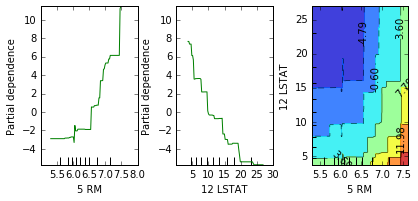

In [6]:
#  Partial dependence plots based on GBM
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
GBM = GradientBoostingRegressor(n_estimators=100, random_state=101).fit(X, y)
features = [5,12,(5,12)]
fig, axs = plot_partial_dependence(GBM, X, features, feature_names=feature_names) 

The plot_partial_dependence class will automatically provide you with the visualization after you provide an analysis plan on your part. You need to present
a list of indexes of the features to be plotted singularly and the tuples of the indexes
of those that you would like to plot on a heat map (the features are the axis, and the
heat value corresponds to the outcome).

In the preceding example, both the average number of rooms and the percentage
of lower status population have been represented, thus displaying an expected
behavior. Interestingly, the heat map, which explains how they together contribute
to the value of the outcome, reveals that they do not interact in any particular way
(it is a single hill-climbing). However, it is also revealed that LSTAT is a strong
delimiter of the resulting housing values when it is above 5.